In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()#读取进来是一个array类型

print(iris.data[:5])
print(iris.target)
print(iris.feature_names)
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(df.head())

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


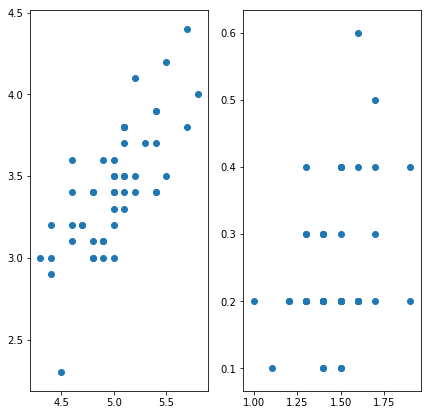

In [3]:
fig,ax=plt.subplots(1,2,figsize=(7,7))#只有一行，则ax索引一个维度就行
ax[0].scatter(df['sepal length (cm)'][:50],df['sepal width (cm)'][:50])
ax[1].scatter(df['petal length (cm)'][:50],df['petal width (cm)'][:50])

In [5]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split#sklearn中已经废弃cross_validation,将其中的内容整合到model_selection中将sklearn.cross_validation 替换为 sklearn.model_selection
rfc=RandomForestClassifier(max_depth=5,n_estimators=10)
x=df
y=iris.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
#print(xtrain)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
print(ypred)
print(ytest)
print(list(zip(ypred,ytest)))
rf=pd.DataFrame(list(zip(ypred,ytest)),columns=['pred','real'])
rf['correct']=rf.apply(lambda r:1 if r['pred']==r['real'] else 0,axis=1 )
#print(rf)
print(rf['correct'].sum()/rf['correct'].count())
print(rfc.feature_importances_)

[0 1 2 0 1 1 2 0 2 0 1 2 0 0 1 1 2 2 1 2 2 2 2 2 1 0 0 1 1 0 2 2 2 1 1 2 2
 0 2 0 1 2 2 0 0]
[0 1 1 0 1 1 1 0 2 0 1 2 0 0 1 1 2 2 1 1 2 1 2 2 1 0 0 1 1 0 2 2 2 1 1 2 2
 0 2 0 1 2 2 0 0]
[(0, 0), (1, 1), (2, 1), (0, 0), (1, 1), (1, 1), (2, 1), (0, 0), (2, 2), (0, 0), (1, 1), (2, 2), (0, 0), (0, 0), (1, 1), (1, 1), (2, 2), (2, 2), (1, 1), (2, 1), (2, 2), (2, 1), (2, 2), (2, 2), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (2, 2), (2, 2), (0, 0), (0, 0)]
0.9111111111111111
[0.14042679 0.04495236 0.40700609 0.40761476]


In [8]:
#决策树
from sklearn import tree
from sklearn.model_selection import train_test_split
clf=tree.DecisionTreeClassifier()
x=df
y=iris.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
print(ypred)
print(ytest)
rf=pd.DataFrame(list(zip(ypred,ytest)),columns=['pred','test'])
#print(rf)
rf['correct']=rf.apply(lambda r: 1 if r['pred']==r['test'] else 0,axis=1)
print(rf['correct'].sum()/rf['correct'].count())

[0 1 0 2 2 2 1 0 0 2 2 2 1 0 2 0 1 2 0 1 2 2 1 0 1 2 2 2 1 2 1 1 2 2 2 0 0
 0 2 1 2 1 2 1 0]
[0 1 0 2 2 2 1 0 0 2 1 2 1 0 2 0 1 2 0 1 2 2 1 0 1 2 2 2 1 2 1 1 2 2 1 0 0
 0 2 1 2 1 2 1 0]
0.9555555555555556
